In [3]:
import networkx as nx
import torch
import torch_geometric as geom
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
import copy
from edge_removing_caa import EdgeRemovingCAA
from edge_removing_gga import EdgeRemovingGGA

%matplotlib inline
%config InlineBackend.figure_format='retina'
%load_ext autoreload
%autoreload 2

In [4]:
def convert_pyg_nx(pyg_graph):
    nx_graph = geom.utils.to_networkx(pyg_graph,edge_attrs=['edge_motif'],node_attrs=['role_id'])
    nx_graph = nx_graph.to_undirected()
    role_id = list((nx.get_node_attributes(nx_graph,'role_id').values()))
    weights = list((nx.get_edge_attributes(nx_graph,'edge_motif').values()))

    """
    We use -1 to represent "style" and 1 to represent content.
    We remap them here for visualization. 
    """
    role_id = ["dodgerblue" if x == 1 else "orangered" for x in role_id]
    weights = [5 if x == 1 else 2 for x in weights]
    return nx_graph, role_id, weights

In [4]:
#Create the dataset, and visualize examples.
!python create_dataset.py 

=> Dataset Name:  tree_a1_4.0
=> Created Output Path:  ../data/tree_a1_4.0
=> Num Graphs:  1000
100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 623.80it/s]
Avg. Num Nodes -- 52.392
Max Nodes -- 71
Avg. Num Edges 60.458
=> Saving:  ../data/tree_a1_4.0/data.pkl


In [17]:
data = torch.load("../data/tree_a1_4.0/data.pkl")
sample = data[3]
nx_graph, role_id, weights = convert_pyg_nx(sample)

In [18]:
"""
Generate Augmentations
"""
caa_aug = EdgeRemovingCAA(pe=0.2)
augmented_caa = caa_aug(copy.deepcopy(sample))
nx_caa_augmented , nx_caa_role, nx_caa_weight = convert_pyg_nx(augmented_caa)


gga_aug = EdgeRemovingGGA(pe=0.2)
augmented_gga = gga_aug(copy.deepcopy(sample))
nx_gga_augmented , nx_gga_role, nx_gga_weight = convert_pyg_nx(augmented_gga)

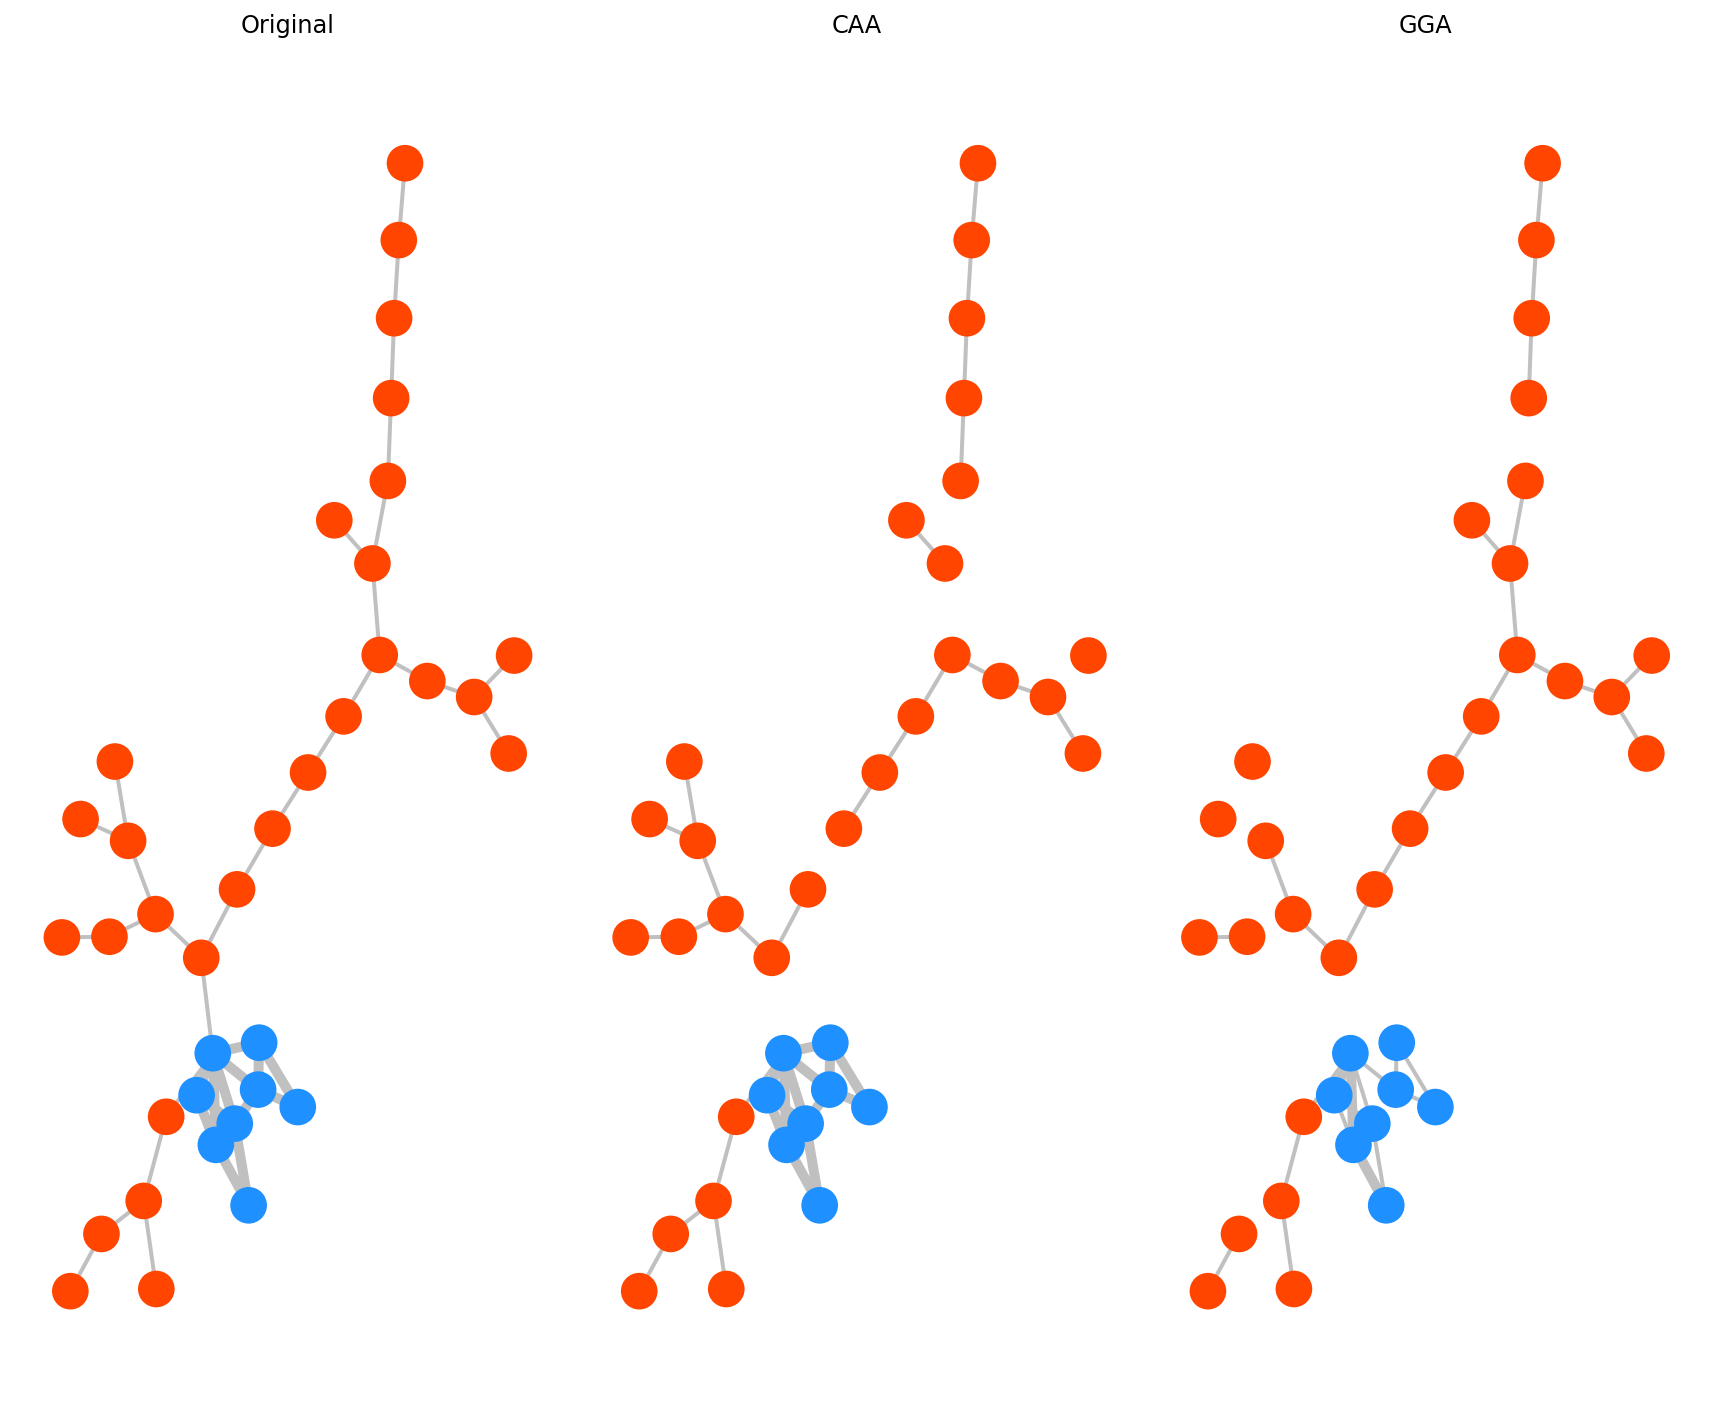

In [19]:
fig, ax = plt.subplots(1,3,figsize=(12,10))
nx.draw(nx_graph, pos=nx.kamada_kawai_layout(nx_graph),width=weights,node_color=list(role_id),edge_color='silver',ax=ax[0])
nx.draw(nx_caa_augmented, pos=nx.kamada_kawai_layout(nx_graph),width=nx_caa_weight,node_color=list(nx_caa_role),edge_color='silver',ax=ax[1])
nx.draw(nx_gga_augmented, pos=nx.kamada_kawai_layout(nx_graph),width=nx_gga_weight,node_color=list(nx_gga_role),edge_color='silver',ax=ax[2])
ax[0].set_title("Original")
ax[1].set_title("CAA")
ax[2].set_title("GGA")
fig.tight_layout()